In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('mode.chained_assignment', None)
import plotly.plotly as py
import plotly.graph_objs as go


In [9]:
df = pd.read_csv("FMEL_Dataset.csv")

In [10]:
def get_points(df,team):
    home = df.loc[df["localTeam"]== team]
    away = df.loc[df["visitorTeam"]== team]
    points = np.where(home["localGoals"] == home["visitorGoals"], 1,np.where(home["localGoals"] > home["visitorGoals"], 3,0))
    points2 = np.where(away["localGoals"] == away["visitorGoals"], 1,np.where(away["localGoals"] < away["visitorGoals"], 3,0))
    gd = home["localGoals"] - home["visitorGoals"]
    gd2 =  away["visitorGoals"] - away["localGoals"] 
    
    gf= home["localGoals"] 
    gf2=  away["visitorGoals"] 
    
    ga= home["visitorGoals"] 
    ga2=  away["localGoals"] 
    
    home["points"] = points
    away["points"] = points2
    
    home["gd"] = gd
    away["gd"] = gd2
        
    home["gf"] = gf
    away["gf"] = gf2
    
    home["ga"] = ga
    away["ga"] = ga2
    
    total = home.append(away)
    return total.groupby("season").sum()


In [23]:
team = get_points(df,"Atletico de Madrid")
team["season"] = team.index.astype(str).str[5:]

team2 = get_points(df,"Barcelona")
team2["season"] = team2.index.astype(str).str[5:]

team3 = get_points(df,"Real Madrid")
team3["season"] = team3.index.astype(str).str[5:]
team3["season"]



season
1970-71    71
1971-72    72
1972-73    73
1973-74    74
1974-75    75
1975-76    76
1976-77    77
1977-78    78
1978-79    79
1979-80    80
1980-81    81
1981-82    82
1982-83    83
1983-84    84
1984-85    85
1985-86    86
1986-87    87
1987-88    88
1988-89    89
1989-90    90
1990-91    91
1991-92    92
1992-93    93
1993-94    94
1994-95    95
1995-96    96
1996-97    97
1997-98    98
1998-99    99
1999-00    00
2000-01    01
2001-02    02
2002-03    03
2003-04    04
2004-05    05
2005-06    06
2006-07    07
2007-08    08
2008-09    09
2009-10    10
2010-11    11
2011-12    12
2012-13    13
2013-14    14
2014-15    15
2015-16    16
2016-17    17
2017-18    18
Name: season, dtype: object

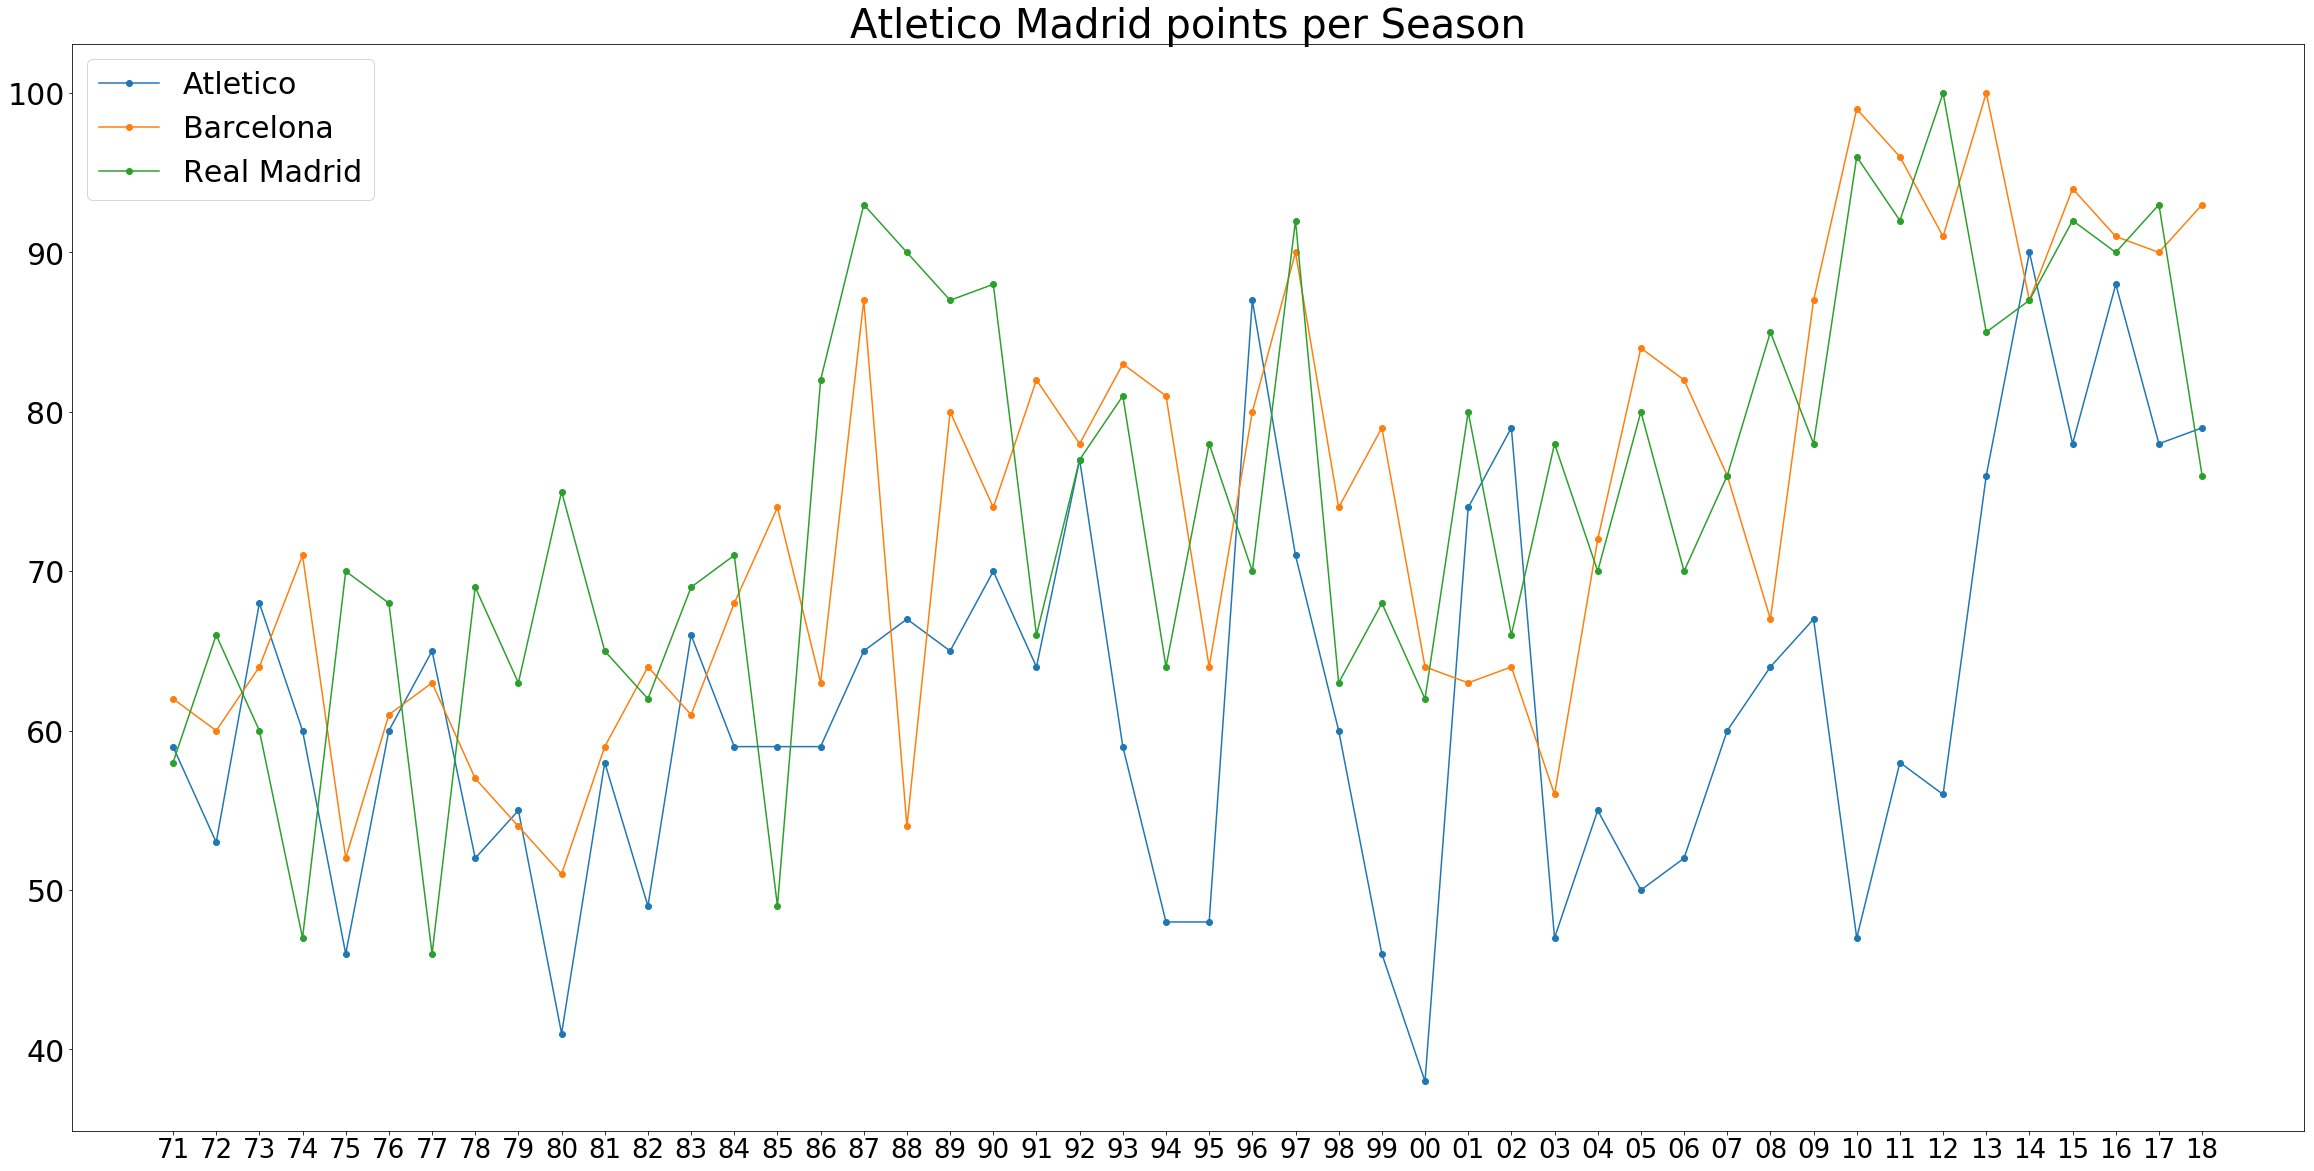

In [28]:

fig = plt.figure(figsize=(40,20))
fig.patch.set_alpha(0.5)
ax = fig.add_subplot(111)
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(30)
ax.set_xticklabels(team["season"],fontsize= 26)
ax.set_title('Atletico Madrid points per Season',fontsize = 40)
line1 =ax.plot(team["points"],'-o')
line2 = ax.plot(team2["points"],'-o')
line3 = ax.plot(team3["points"],'-o')
plt.legend( ('Atletico', 'Barcelona', 'Real Madrid'), prop={'size': 30})


In [13]:


# Edit the layout
trace0 = go.Scatter(
    x= barca["season"],
    y = barca["points"],
    name = 'Points per Season',
     mode = 'lines',

)
data = [trace0]
layout = dict(title = 'Barcelona oin',
         
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

C:\Users\gaber\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



,id,division,round,localGoals,visitorGoals,timestamp,points
season,,,,,,,
2013-14,1258828,38,741,82,51,52780352400,87
2014-15,1290817,38,741,74,57,54006966000,94
2015-16,1322811,38,741,82,59,55191171600,91
2016-17,1354846,38,741,84,69,56402488800,90
2017-18,1386836,38,741,71,57,57589714800,93


In [7]:
df.localTeam.unique()

array(['Atletico de Bilbao', 'Las Palmas', 'Real Madrid', 'Celta de Vigo',
       'Elche', 'Espanol', 'Sabadell', 'Zaragoza', 'Valencia',
       'Atletico de Madrid', 'Barcelona', 'Sporting de Gijon', 'Granada',
       'CD Malaga', 'Real Sociedad', 'Sevilla', 'Cadiz', 'Deportivo',
       'Moscardo', 'Calvo Sotelo', 'Ontinyent', 'Logrones', 'Castellon',
       'Langreo', 'Sant Andreu', 'Hercules', 'Pontevedra', 'Burgos',
       'Mallorca', 'Cordoba', 'Oviedo', 'Santander', 'Betis',
       'Villarreal', 'Rayo Vallecano', 'Racing de Ferrol',
       'Cultural Leonesa', 'Valladolid', 'Xerez', 'Mestalla', 'Tenerife',
       'Osasuna', 'Barakaldo', 'Gimnastic de Tarragona', 'Murcia',
       'Linares CF', 'Levante', 'Salamanca', 'Ourense',
       'Recreativo de Huelva', 'Alaves', 'Barcelona Atletic', 'Terrassa',
       'Ensidesa', 'Jaen', 'Getafe Deportivo', 'AD Almeria', 'Castilla',
       'Algeciras', 'Palencia CF', 'AD Ceuta', 'Atletico Madrileno',
       'Cartagena', 'Bilbao Athletic', 'Lo